# Introduction to neural network classification with TensorFlow

In [ ]:
# Let's create the sample dataset
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

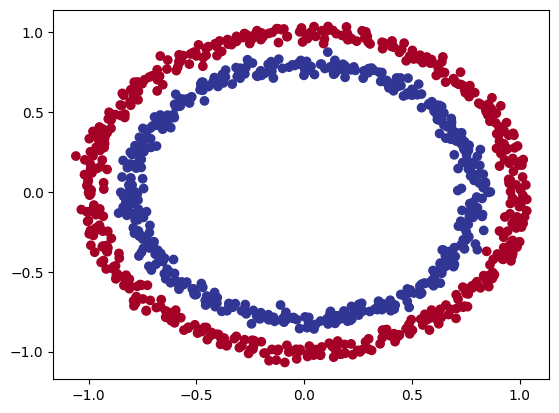

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Let's create the model and fit the data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define the model
model = Sequential([
    Input(shape=(2,)),               # 2 input features
    Dense(16, activation='relu'),    # 1st hidden layer
    Dense(8, activation='relu'),     # 2nd hidden layer
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(X, y, epochs=70)

Epoch 1/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4970 - loss: 0.7017
Epoch 2/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4869 - loss: 0.6971
Epoch 3/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4670 - loss: 0.6952
Epoch 4/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4877 - loss: 0.6936
Epoch 5/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4886 - loss: 0.6927
Epoch 6/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5066 - loss: 0.6895
Epoch 7/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4839 - loss: 0.6921
Epoch 8/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5190 - loss: 0.6876
Epoch 9/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5047 - loss: 0.6868
Epoch 10/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5138 - loss: 0.6852
Epoch 11/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5067 - loss: 0.6866
Epoch 12/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5246 - lo

## Visualizing the performance of the model

In [ ]:
# Let's create the function to visualize it
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()] #stacks 2-d array together

    # Make predictions and reshape the result
    y_pred = model.predict(x_in)
    z = y_pred.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


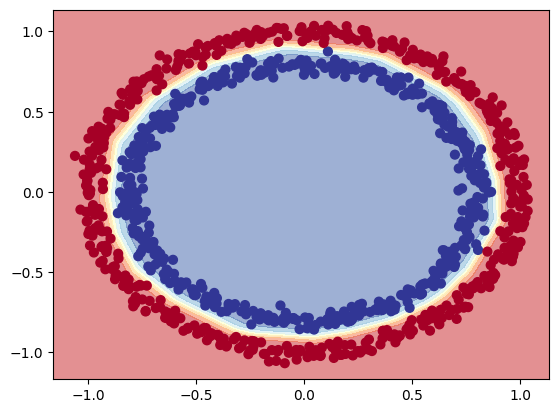

In [ ]:
plot_decision_boundary(model, X, y)

## Plot the loss (or training) curve

In [ ]:
history.history

{'accuracy': [0.49799999594688416,
  0.46399998664855957,
  0.45899999141693115,
  0.4779999852180481,
  0.49300000071525574,
  0.4959999918937683,
  0.5070000290870667,
  0.5009999871253967,
  0.5,
  0.5009999871253967,
  0.5270000100135803,
  0.531000018119812,
  0.5289999842643738,
  0.5339999794960022,
  0.5429999828338623,
  0.5460000038146973,
  0.5450000166893005,
  0.5559999942779541,
  0.5580000281333923,
  0.5609999895095825,
  0.5820000171661377,
  0.5929999947547913,
  0.6809999942779541,
  0.7419999837875366,
  0.7279999852180481,
  0.824999988079071,
  0.8600000143051147,
  0.8289999961853027,
  0.8420000076293945,
  0.9129999876022339,
  0.9100000262260437,
  0.9020000100135803,
  0.9229999780654907,
  0.9580000042915344,
  0.9829999804496765,
  0.9409999847412109,
  0.9879999756813049,
  0.9829999804496765,
  0.9869999885559082,
  0.9900000095367432,
  0.9879999756813049,
  0.9919999837875366,
  0.9959999918937683,
  0.9950000047683716,
  0.9959999918937683,
  0.9969999

In [ ]:
import pandas as pd

history_data = pd.DataFrame(history.history)

<Axes: >

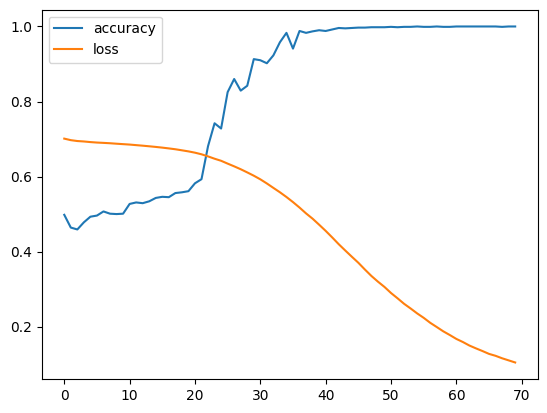

In [ ]:
history_data.plot()

## Finding the best learning rate


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define the model
model = Sequential([
    Input(shape=(2,)),               # 2 input features
    Dense(16, activation='relu'),    # 1st hidden layer
    Dense(8, activation='relu'),     # 2nd hidden layer
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Create a learning_rate callback
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20)
)

# Fit the model
history = model.fit(X, y, epochs=100, callbacks=[learning_rate_callback])

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4969 - loss: 0.6904 - learning_rate: 1.0000e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4888 - loss: 0.6921 - learning_rate: 1.1220e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4975 - loss: 0.6907 - learning_rate: 1.2589e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4983 - loss: 0.6899 - learning_rate: 1.4125e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4877 - loss: 0.6914 - learning_rate: 1.5849e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5242 - loss: 0.6898 - learning_rate: 1.7783e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4956 - loss: 0.6901 - learning_rate: 1.9953e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5068 - loss: 0.6891 - learning_rate: 2.2387e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5353 - loss: 0.6872 - learning_

<Axes: >

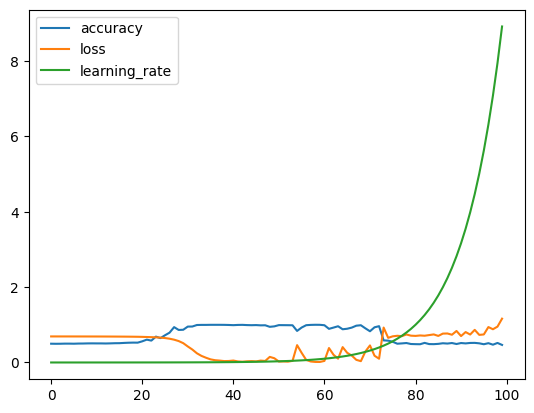

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

Text(0, 0.5, 'Loss')

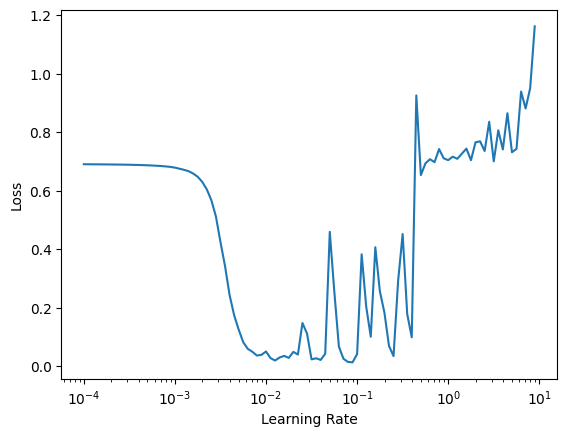

In [ ]:
# Plot the learning rate versus loss
import numpy as np

lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

## Working with multiclass data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Let's build the model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# let's fit the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7093 - loss: 6.0269 - val_accuracy: 0.7557 - val_loss: 0.8153
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7979 - loss: 0.6288 - val_accuracy: 0.7813 - val_loss: 0.6539
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8208 - loss: 0.5224 - val_accuracy: 0.8288 - val_loss: 0.5386
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8291 - loss: 0.4882 - val_accuracy: 0.8072 - val_loss: 0.5369
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8367 - loss: 0.4622 - val_accuracy: 0.8193 - val_loss: 0.5218
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8415 - loss: 0.4481 - val_accuracy: 0.8221 - val_loss: 0.5011
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8513 - loss: 0.4126 - val_accuracy: 0.8476 - val_loss: 0.4427
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8587 - loss: 0.3989 

In [ ]:
# Normalizing the data
X_train.min(), X_train.max()

(np.uint8(0), np.uint8(255))

In [ ]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [ ]:
# Now let's fit the normalized data
model.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7614 - loss: 0.6635 - val_accuracy: 0.8588 - val_loss: 0.4028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8767 - loss: 0.3449 - val_accuracy: 0.8686 - val_loss: 0.3771
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8809 - loss: 0.3297 - val_accuracy: 0.8690 - val_loss: 0.3752
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8846 - loss: 0.3155 - val_accuracy: 0.8594 - val_loss: 0.3977
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8876 - loss: 0.3034 - val_accuracy: 0.8671 - val_loss: 0.3676
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8920 - loss: 0.2906 - val_accuracy: 0.8739 - val_loss: 0.3579
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8936 - loss: 0.2875 - val_accuracy: 0.8738 - val_loss: 0.3647
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8967 - loss: 0.2806

In [ ]:
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_norm.min(), X_train_norm.max()

(np.float64(0.0), np.float64(1.0))

### Finding the ideal learning rate

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 20)
)

history = model.fit(X_train_norm, y_train, epochs=100, callbacks=[lr_scheduler], validation_data=(X_test_norm, y_test))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1014 - loss: 2.4100 - val_accuracy: 0.1000 - val_loss: 2.4112 - learning_rate: 1.0000e-05
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1006 - loss: 2.4088 - val_accuracy: 0.1000 - val_loss: 2.4061 - learning_rate: 1.1220e-05
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1000 - loss: 2.4036 - val_accuracy: 0.1000 - val_loss: 2.4006 - learning_rate: 1.2589e-05
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1002 - loss: 2.3983 - val_accuracy: 0.1000 - val_loss: 2.3948 - learning_rate: 1.4125e-05
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1001 - loss: 2.3912 - val_accuracy: 0.1000 - val_loss: 2.3885 - learning_rate: 1.5849e-05
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1029 - loss: 2.3854 - val_accuracy: 0.1000 - val_loss: 2.3819 - learning_rate: 1.7783e-05
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 

Text(0, 0.5, 'Loss')

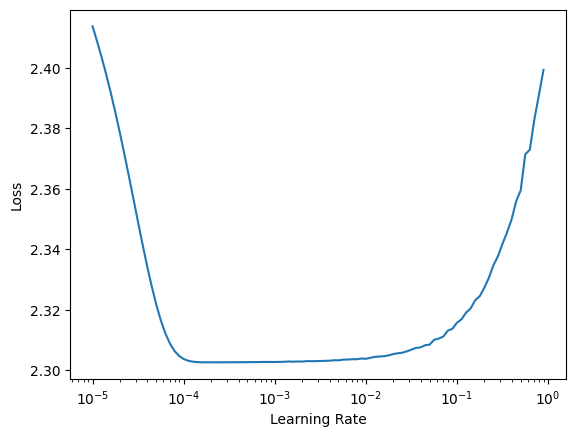

In [ ]:
# Let's plot the learning_rate vs. loss
import numpy as np

lrs = 1e-5 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

Looks like the ideal learning_rate is 1e-4 and let's use this learning rate for our model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1003 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0984 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0970 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1019 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0983 - loss: 2.3026 

I don't understand why the model performs so poor compared to the first one. Let's use the first model, cause it performed well

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# let's fit the model
model.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7758 - loss: 0.6350 - val_accuracy: 0.8363 - val_loss: 0.4654
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8627 - loss: 0.3753 - val_accuracy: 0.8574 - val_loss: 0.3907
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8771 - loss: 0.3353 - val_accuracy: 0.8583 - val_loss: 0.3877
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8844 - loss: 0.3100 - val_accuracy: 0.8700 - val_loss: 0.3682
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8902 - loss: 0.2920 - val_accuracy: 0.8610 - val_loss: 0.4043
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8951 - loss: 0.2801 - val_accuracy: 0.8737 - val_loss: 0.3534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9020 - loss: 0.2627 - val_accuracy: 0.8780 - val_loss: 0.3529
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9044 - loss: 0.2517

In [ ]:
# let's evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test_norm)
cm = confusion_matrix(y_test, y_preds.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Overall, it looks good

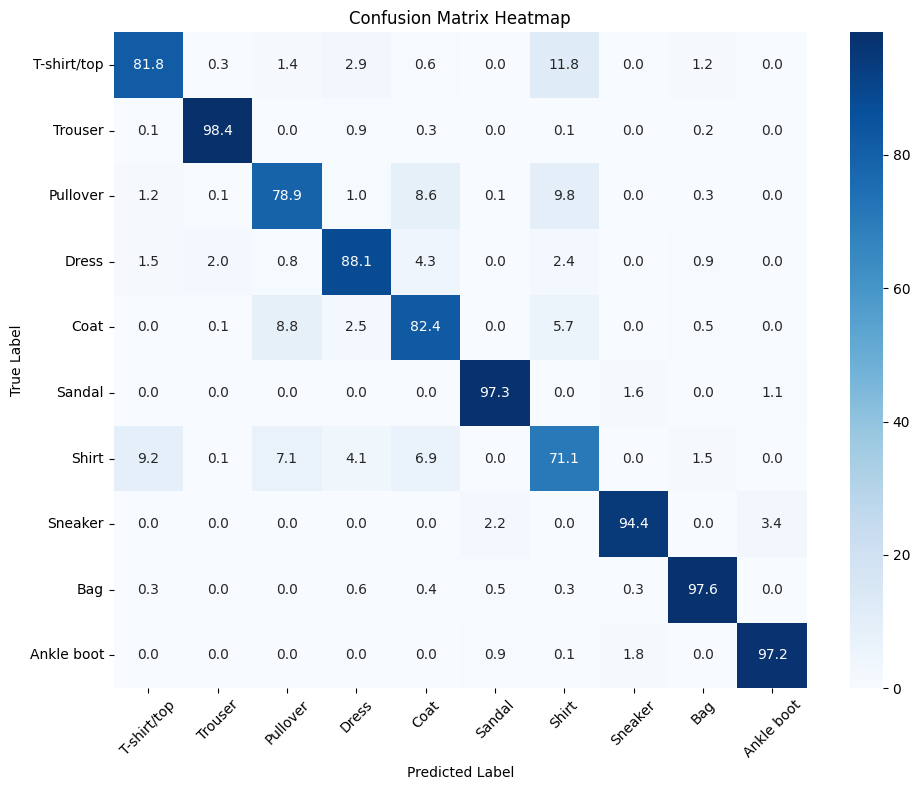

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## What Patterns is our model learning?

In [ ]:
# Find layers of our model
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [ ]:
weights, biases = model.layers[1].get_weights()
weights, biases

(array([[-0.10825947,  0.3451468 , -0.0256755 , ..., -0.16635877,
          0.0181314 , -0.07527824],
        [ 0.13897778, -0.039828  ,  0.07044529, ..., -0.17777476,
          0.02792623, -0.02387829],
        [-0.40999886, -0.12115531, -0.05680618, ..., -0.14942147,
          0.04678967, -0.01729809],
        ...,
        [-0.25516623,  0.06239869, -0.07900827, ...,  0.05539293,
          0.00437326, -0.08106242],
        [-0.28655222, -0.07892805,  0.02343709, ...,  0.16626324,
          0.00645006, -0.03494156],
        [-0.32118222, -0.09848095, -0.04235782, ..., -0.34834084,
          0.02161218,  0.07661345]], dtype=float32),
 array([-0.37806427,  0.27690926, -0.02907872,  0.57314605,  0.5380205 ,
         0.3597755 ,  0.175585  ,  0.31737027,  0.11759342,  0.56568193,
         0.28306237,  0.27123535, -0.37377357,  0.23906724, -0.01067644,
         0.4002223 ,  0.01808544,  0.02356815,  0.2559936 ,  0.01008628,
        -0.01249256,  0.5131603 , -0.30003324, -0.0837632 ,  0.021

In [ ]:
weights.shape, biases.shape

((784, 128), (128,))

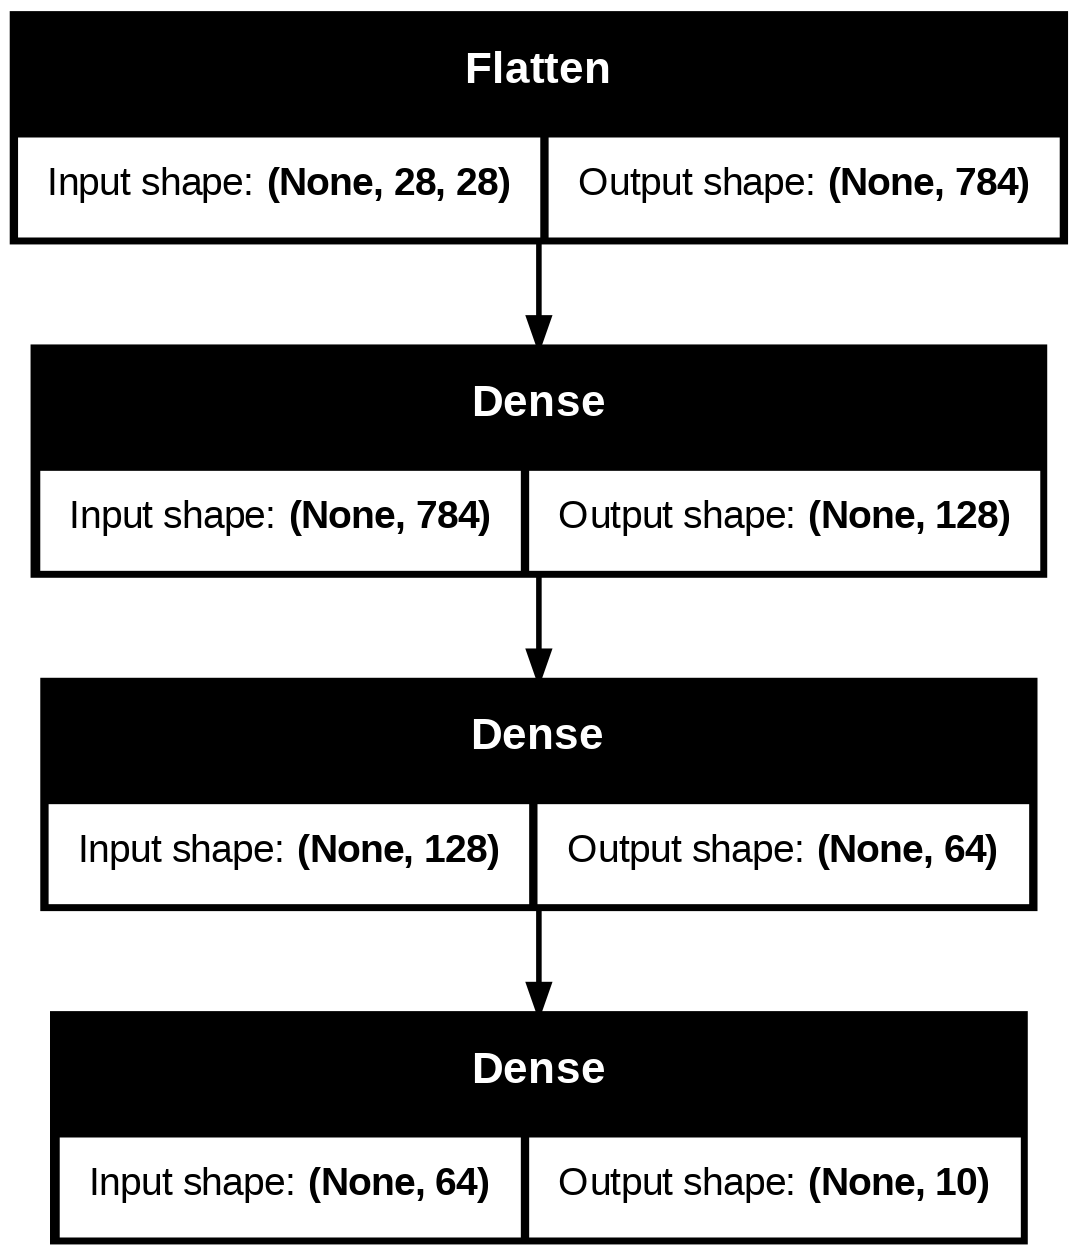

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## This is the end of this notebook